- author: Lee Meng
- date: 2018-12-24 08:00
- title: 進入 NLP 世界的最佳橋樑：寫給所有人的自然語言處理與深度學習入門指南
- slug: shortest-path-to-the-nlp-world-a-gentle-guide-of-natural-language-processing-and-deep-learning-for-everyone
- tags: 自然語言處理, Keras, Python, 深度學習
- description:
- summary:
- image: amogh-manjunath-773461-unsplash.jpg
- image_credit_url: https://unsplash.com/photos/qVZTU3lTKnU?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText
- status: draft

!quote
- 希望這篇文章能成為你前往自然語言處理世界的最佳橋樑。

自從[ 11 月從比利時 EMNLP]({filename}20181113-emnlp-2018.ipynb) 回來後，最近工作之餘都在學習[自然語言處理](https://zh.wikipedia.org/wiki/%E8%87%AA%E7%84%B6%E8%AF%AD%E8%A8%80%E5%A4%84%E7%90%86)（Natural Language Processing, 後簡稱為 NLP）。

上上週陰錯陽差地參加了一個 [Kaggle](https://www.kaggle.com/) 競賽。在該比賽中，我實際應用到不少前陣子所學的 NLP 知識，也獲得不少心得。

!image
- emnlp2018/nlp-word-cloud.jpg

因此我想借此機會，在文中鉅細靡遺地介紹自己在這次比賽運用以及學到的 NLP 概念，希望能幫助更多對人工智慧、[深度學習](https://zh.wikipedia.org/zh-tw/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0)或是 NLP 有興趣但卻不知如何開始的你，在閱讀本故事之後能得到一些啟發與方向，並展開自己的 NLP 之旅。

!image
- nlp-kaggle-intro/chris-ried-512801-unsplash.jpg

雖然不是必備，但有點程式經驗會讓你比較好理解本文的內容，因為在文中有不少 [Python](https://www.python.org/) 程式碼；另外，如果你熟悉[深度學習（Deep Learning）](https://zh.wikipedia.org/zh-hant/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0)以及[神經網路（Neural Network）](https://zh.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C)，那你可以趁機複習一些以前學過的東西。

依據維基百科，NLP 的定義為：

!quote
- 自然語言處理（NLP）是計算機科學以及人工智慧的子領域，專注在如何讓計算機處理並分析大量（人類的）自然語言數據。NLP 常見的挑戰有語音辨識、自然語言理解、機器翻譯以及自然語言的生成。

在這篇文章裡頭，我將描述如何利用最近學到的 NLP 知識以及深度學習框架 [Keras](https://keras.io/) 來教會神經網路如何辨別眼前的假新聞。

!image
- nlp-kaggle-intro/robot-read.jpg

儘管此文的 NLP 任務是假新聞分類，你將可以把從此文學到的基礎知識運用到如機器翻譯、教機器寫詩、語音辨識等大部分的 NLP 任務。我也會在文末附上[推薦的學習資源以及文章](#3-門強力推薦的深度學習-/-NLP-線上課程)供你進一步探索。

如果你已經準備好展開一趟刺激的 NLP 冒險旅程的話，就繼續往下閱讀吧！

## 本文章節
<ul>
    <li><a class="toc-href" href="#30-秒懶人包" title="30 秒懶人包">30 秒懶人包</a></li>
    <li><a class="toc-href" href="#意料之外的-Kaggle-競賽" title="意料之外的 Kaggle 競賽">意料之外的 Kaggle 競賽</a></li>
    <li><a class="toc-href" href="#假新聞分類任務" title="假新聞分類任務">假新聞分類任務</a></li>
    <li><a class="toc-href" href="#用直覺找出第一條底線" title="用直覺找出第一條底線">用直覺找出第一條底線</a></li>
    <li>
        <a class="toc-href" href="#資料前處理：讓機器能夠處理文字" title="資料前處理：讓機器能夠處理文字">資料前處理：讓機器能夠處理文字</a>
    </li>
    <li><a class="toc-href" href="#有記憶的循環神經網路_1" title="有記憶的循環神經網路">有記憶的循環神經網路</a></li>
    <li><a class="toc-href" href="#記憶力好的-LSTM-細胞" title="記憶力好的 LSTM 細胞">記憶力好的 LSTM 細胞</a></li>
    <li><a class="toc-href" href="#詞向量：將詞彙表達成有意義的向量" title="詞向量：將詞彙表達成有意義的向量">詞向量：將詞彙表達成有意義的向量</a></li>
    <li><a class="toc-href" href="#一個神經網路，兩個新聞標題" title="一個神經網路，兩個新聞標題">一個神經網路，兩個新聞標題</a></li>
    <li>
        <a class="toc-href" href="#深度學習-3-步驟" title="深度學習 3 步驟">深度學習 3 步驟</a>
    </li>
    <li><a class="toc-href" href="#進行預測並提交結果_1" title="進行預測並提交結果">進行預測並提交結果</a></li>
    <li><a class="toc-href" href="#我們是怎麼走到這裡的" title="我們是怎麼走到這裡的">我們是怎麼走到這裡的</a></li>
    <li><a class="toc-href" href="#3-門推薦的線上課程" title="3 門推薦的線上課程">3 門推薦的線上課程</a></li>
    <li><a class="toc-href" href="#結語：從掌握基礎到運用巨人之力" title="結語：從掌握基礎到運用巨人之力">結語：從掌握基礎到運用巨人之力</a></li>
</ul>

章節不少，善用傳送門能讓你更輕鬆地在各章節之間跳轉。

!image
- nlp-kaggle-intro/toc-intro.jpg
- 章節傳送門（目前寬螢幕限定）

## 30 秒懶人包

沒錯，光看上面的章節數，你應該了解無法在 10 分鐘內 KO 這篇文章，但我保證這篇文章會是你學習 NLP 基礎的最短捷徑。

針對那些時間寶貴的你，我在這邊直接列出本文想傳達的 3 個重要訊息：
1. 深度學習發展神速，令人不知從何開始學習。但你總是要[從某個地方開始好好地學習基礎](#換你上場：3-門推薦課程)
2. NLP 接下來的發展只會更加快速，就連一般人也能弄出厲害的語言處理模型
2. 站在巨人的肩膀之上，活用前人成果與經驗能讓你前進地更快，更有效率

這些陳述看似陳腔濫調，但希望好奇心能讓你實際閱讀本文，找出構成這些結論的蛛絲馬跡。

讓我們開始吧！

## 意料之外的 Kaggle 競賽

[Kaggle](https://www.kaggle.com/) 是一個資料科學家以及機器學習愛好者互相切磋的數據建模和數據分析競賽平台。

本文提到的 Kaggle 競賽是 [WSDM - Fake News Classification](https://www.kaggle.com/c/fake-news-pair-classification-challenge)。

此競賽的目的在於想辦法自動找出假新聞以節省人工檢查的成本。資料集則是由中國的手機新聞應用：[今日頭條](https://www.toutiao.com/)的母公司[字節跳動](https://zh.wikipedia.org/wiki/%E5%AD%97%E8%8A%82%E8%B7%B3%E5%8A%A8)所提出的。（知名的抖音也是由該公司的產品）

!image
- nlp-kaggle-intro/wsdm-intro.jpg
- 本文的 Kaggle 競賽
- https://www.kaggle.com/c/fake-news-pair-classification-challenge

而因為我所任職的 [SmartNews](https://www.smartnews.com/en/) 主打產品也是手機新聞應用（主要針對日本與美國用戶），像是這種哪個企業又辦了 Kaggle 競賽、又開發什麼新功能等等的消息都會在公司內部流動。

話雖如此，在我從同事得知這個為期一個月的競賽時，事實上離截止時間只剩一個禮拜了！（傻眼）

!image
- emnlp2018/emnlp-entrance.jpg
- 今年 10 月底參加的 EMNLP
- {filename}20181113-emnlp-2018.ipynb

但心念一轉，想說從 [EMNLP 會議]({filename}20181113-emnlp-2018.ipynb)回來後也學了一些不少 NLP 知識，不仿就趁著這個機會，試著在一週內兜出個模型來解決這個問題。

名符其實的「志在參加」。

## 假新聞分類任務
既然決定要參加了，當然得看看資料集長的什麼樣子。訓練資料集（Training Set）約有 32 萬筆數據、測試資料集（Test Set）則約為 8 萬筆。而訓練資料集一部份的內容如下所示：

!image
- nlp-kaggle-intro/view-data-on-kaggle.jpg

要了解此資料集，讓我們先專注在第一列（Row），大蒜與地溝油新聞的每一個欄位。

（部分讀者可能會對簡體中文表示意見，但請體諒我沒有辦法事先將此大量數據全部轉為繁體）

第一欄位 `title1_zh` 代表的是「已知假新聞」 A 的中文標題：

```text
用大蒜鉴别地沟油的方法,怎么鉴别地沟油
```

而第二欄位 `title2_zh` 則是一筆新的新聞 B 的中文標題，我們還不知道它的真偽：

```text
翻炒大蒜可鉴别地沟油
```

要判斷第二欄中的新聞標題是否為真，我們可以把它跟已知的第一篇假新聞做比較，分為 3 個類別：
- `unrelated`：B 跟 A 沒有關係
- `agreed`：B 同意 A 的敘述
- `disagreed`：B 不同意 A 的敘述

如果新聞 B 同意假新聞 A 的敘述的話，我們可以將 B 也視為一個假新聞；而如果 B 不同意假新聞 A 的敘述的話，我們可以放心地將 B 新聞釋出給一般大眾查看；如果 B 與 A 無關的話，可以考慮再進一步處理 B。（這處理不在本文討論範疇內）

!image
- nlp-kaggle-intro/chris-liverani-552022-unsplash.jpg
- 如果 B 新聞「同意」假新聞 A 的話，我們大可將 B 新聞也視為假新聞，最後將其屏除

接著看到資料集（下圖）第一列最右邊的 `label` 欄位為 `agreed`，代表 B 同意 A 的敘述，則我們可以判定 B 也是假新聞。

!image
- nlp-kaggle-intro/view-data-on-kaggle.jpg

這就是一個簡單的「假新聞分類問題」：給定一個成對的新聞標題 A & B，在已知 A 為假新聞的情況下，預測 B 跟 A 之間的關係。其關係可以分為 3 個類別：
- unrelated
- agreed
- disagreed

順帶一提，上圖同時包含了 3 個類別的例子供你了解不同分類的實際情況。

第 3、 4 欄位則為新聞標題的英文翻譯。而因為該翻譯為機器翻譯，不一定能 100% 正確反映本來中文新聞想表達的意思，因此接下來的文章會忽視這兩個欄位，只使用簡體中文的新聞標題來訓練 NLP 模型。

## 用直覺找出第一條底線

現在任務目標很明確了，我們就是要將有 32 萬筆數據的訓練資料集（Training Set）交給我們的 NLP 模型，讓它「閱讀」每一列裡頭的假新聞 A 與新聞 B 的標題並瞭解它們之間的關係（不相關、B 同意 A、B 不同意 A）。

理想上，在看過一大堆案例以後，我們的模型就能夠「學會」一些法則，讓它在被給定一組從來沒看過的假新聞標題 A 以及新聞標題 B 的情況下，也能正確判斷新聞 A 與新聞 B 的關係。

而所謂的「模型從來沒看過的數據」，指的當然就是 8 萬筆的測試資料集（Test Set）了。

!image
- nlp-kaggle-intro/Train-Test-Split-Diagram.jpg
- 我們利用訓練資料集教模型學習，並用測試資料集挑戰模型
- https://elitedatascience.com/model-training

這樣的陳述是一個非常典型的[機器學習（Machine Learning, ML）](https://zh.wikipedia.org/wiki/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0)問題。我們當然希望不管使用什麼樣的模型，該模型都能夠幫我們減少人工檢查的成本，並同時最大化分類的準確度。

但在開始使用任何 ML 方法之前，為了衡量我們的自動化模型能提供多少潛在價值，讓我們先找出一個簡單方法作為底線（Baseline）。

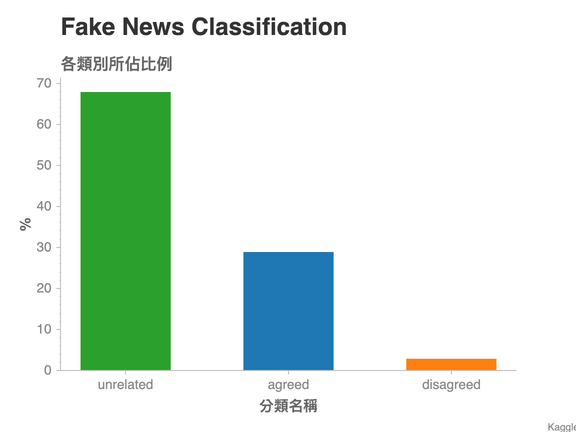

In [2]:
#ignore
import chartify
import pandas as pd

df = pd.DataFrame({'label': ['unrelated', 'agreed', 'disagreed'], 'percentage': [68, 29, 3]})
ch = chartify.Chart(x_axis_type='categorical', layout='slide_75%')
ch.plot.bar(df, 'label', 'percentage', color_column='label')
ch.set_title("Fake News Classification")
ch.set_subtitle("各類別所佔比例")
ch.axes.set_yaxis_label("％")
ch.axes.set_xaxis_label("分類名稱")
ch.set_source_label("Kaggle")

ch.show('png')

這張圖顯示了訓練資料集（Training Set）裏頭各個分類所佔的比例。是一個常見的 Unbalanced Dataset：特定的分類佔了數據的大半比例。

我們可以看到接近 70 % 的「成對新聞」都是不相關的。這邊的「成對新聞」指的是資料集裡，每一行的假新聞標題 A 以及對應的標題 B 所組成的 pairs。

現在假設測試資料集（Test Set）的數據分佈跟訓練資料集相差不遠，且衡量一個分類模型的指標是準確度（Accuracy）：100 組成對新聞中，模型猜對幾組。

這時候如果要你用一個簡單法則來分類所有成對新聞，並同時最大化準確度，你會怎麼做？

!image
- airflow/thought-2123970_1280.jpg

對沒錯，就是全部猜 `unrelated` 就對了！

事實上，此競賽在 Evaluation 階段使用 [Weighted Categorization Accuracy](https://www.kaggle.com/c/fake-news-pair-classification-challenge#evaluation)，來稍微調降猜對 `unrelated` 的分數。畢竟（1）能正確判斷出兩個新聞是 `unrelated` 跟（2）能判斷出新聞 B `disagreed` 假新聞 A 的價值是不一樣的。（後者的價值比較高，因為比較稀有）

但使用[多數票決（Majority Votes）](https://en.wikipedia.org/wiki/Majority_rule)的簡單方法還是能得到 0.666 的成績（滿分為 1）：

!image
- nlp-kaggle-intro/major-baseline.jpg

不過當你前往該 [Kaggle 排行榜](https://www.kaggle.com/c/fake-news-pair-classification-challenge/leaderboard)的時候，卻會發現不少人低於這個標準：

!image
- nlp-kaggle-intro/find-the-baseline-for-ml.jpg

第一次參加 Kaggle 的人可能會覺得這現象很奇怪。

但這是由於 Kaggle 競賽 1 天只能提交 2 次結果，因此通常不會有人浪費提交次數來上傳「多數票決」的結果（儘管分數會上升，大家還是會想把僅僅 2 次的上傳機會用來測試自己的 ML 模型的準確度）；另外也是因為不少人是上傳 1、2 次就放棄比賽了。

但如果你的 ML 或深度學習模型怎樣都無法超過一個簡單法則的 baseline 的話，或許最後上傳該 baseline 的結果也不失為提升排名的最後手段（笑）

!quote
- 找出 Baseline，可以讓我們判斷手上訓練出來的機器學習模型有多少潛在價值、值不值得再繼續花費自己的研究時間與電腦計算能力。

現在我們知道，要保證做出來的模型有點價值，最少要超過 baseline 才可以。以本文來說，就是多數票決法則得到的 0.666 準確度。

（ baseline 的定義依照研究目的以及比較方法而有所不同）

## 資料前處理：讓機器能夠處理文字

要讓電腦或是任何 NLP 模型理解一篇新聞標題在說什麼，我們不能將自己已經非常習慣的語言文字直接扔給電腦，而是要轉換成它熟悉的形式：數字。

!image
- nlp-kaggle-intro/mika-baumeister-703680-unsplash.jpg

因此這章節就是介紹一系列的數據轉換步驟，來將人類熟悉的語言如：

```text
用大蒜鉴别地沟油的方法,怎么鉴别地沟油
```

轉換成人腦不易理解，但很「機器友善」的數字序列：

```text
[217, 1268, 32, 1178, 25, 489, 116]
```

如果你對此步驟已經非常熟悉，可以假設我們已經做完資料前處理，並直接跳到下一章的[有記憶的循環神經網路](#有記憶的循環神經網路_1)。

這章節的數據轉換步驟包含：
- [文本分詞（Text Segmentation）](#文本分詞)
- [建立字典並將文本轉成數字序列](#建立字典並將文本轉成數字序列)
- [序列的 Zero Padding](#序列的-Zero-Padding)
- [將正解做 One-hot Encoding](#將正解做-One-hot-Encoding)

如果你現在不知道上述所有詞彙的意思，別擔心！

你接下來會看到文字數據在丟入機器學習 / 深度學習模型之前，通常需要經過什麼轉換步驟。搭配說明，我相信你可以輕易地理解以下每個步驟的邏輯。

在這之前，先讓我們用 [Pandas](https://pandas.pydata.org/) 將訓練資料集讀取進來：

In [1]:
#ignore
TRAIN_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/train.csv'
TRAIN_TOKENIZED_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/train_tokenized.csv'

In [2]:
import pandas as pd
train = pd.read_csv(
    TRAIN_CSV_PATH, index_col=0)
train.head(3)

,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
id,,,,,,,
0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated


跟我們在 Kaggle 預覽的數據一致。不過為了畫面簡潔，讓我們只選取 2 個中文新聞標題以及分類結果（Label）的欄位：

In [3]:
cols = ['title1_zh', 
        'title2_zh', 
        'label']
train = train.loc[:, cols]
train.head(3)

,title1_zh,title2_zh,label
id,,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,unrelated
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,unrelated
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,unrelated


有了必要的欄位以後，我們可以開始進行數據的前處理了。

### 文本分詞

[文本分詞（Text Segmentation）](https://en.wikipedia.org/wiki/Text_segmentation)是一個將一連串文字切割成多個有意義的單位的步驟。這單位可以是
- 一個中文漢字 / 英文字母（Character）
- 一個中文詞彙 / 英文單字（Word）
- 一個中文句子 / 英文句子（Sentence）

依照不同的 NLP 任務會有不同切割需求，但很常見的切法是以單字（Word）為單位，也就是 Word Segmentation。

!image
- nlp-kaggle-intro/word-segmentation.jpg

以英文來說，Word Segmentation 十分容易。通常只要依照空白分割，就能得到一個有意義的詞彙列表了（在這邊讓我們無視標點符號）：

In [102]:
text = 'I am Meng Lee, a data scientist based in Tokyo.'
words = text.split(' ')
words

['I', 'am', 'Meng', 'Lee,', 'a', 'data', 'scientist', 'based', 'in', 'Tokyo.']

但很明顯地，中文無法這樣做。這時候我們將藉助 [Jieba](https://github.com/fxsjy/jieba) 這個中文斷詞工具，來為一連串的文字做有意義的切割：

In [100]:
import jieba.posseg as pseg

text = '我是李孟，在東京工作的數據科學家'
words = pseg.cut(text)
[word for word in words]

[pair('我', 'r'),
 pair('是', 'v'),
 pair('李孟', 'nr'),
 pair('，', 'x'),
 pair('在', 'p'),
 pair('東京', 'ns'),
 pair('工作', 'vn'),
 pair('的', 'uj'),
 pair('數據', 'n'),
 pair('科學家', 'n')]

如上所示，Jieba 將我們的中文文本切成有意義的詞彙列表，並為每個詞彙附上對應的詞性（Flag）。

假設我們不需要標點符號，則只要將 `flag == x` 的詞彙去除即可。

我們可以寫一個很簡單的 Jieba 斷詞函式，此函式能將輸入的文本 `text` 斷詞，並回傳除了標點符號以外的詞彙列表：

In [99]:
def jieba_tokenizer(text):
    words = pseg.cut(text)
    return ' '.join([
        word for word, flag in words if flag != 'x'])

我們可以利用 Pandas 的 `apply` 函式，將 `jieba_tokenizer` 套用到所有新聞標題 A 以及 B 之上，做文本分詞：

In [ ]:
train['title1_tokenized'] = \
    train.loc[:, 'title1_zh'] \
         .apply(jieba_tokenizer)
train['title2_tokenized'] = \
    train.loc[:, 'title2_zh'] \
         .apply(jieba_tokenizer)

新聞標題 A 的斷詞結果如下：

In [114]:
#ignore
train = pd.read_csv(TRAIN_TOKENIZED_CSV_PATH, index_col=0).iloc[:, 2:]

# 去除空值（只有兩筆）
empty_title = ((train['title2_zh'].isnull()) | (train['title1_zh'].isnull()) | (train['title2_zh'] == '') | (train['title2_zh'] == '0'))
train = train[~empty_title]

# 將 tokenized 結果有數字的設為空字串
train = train.fillna('')

In [115]:
train.iloc[:, [0, 3]].head()

,title1_zh,title1_tokenized
id,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


新聞標題 B 的結果則為：

In [116]:
train.iloc[:, [1, 4]].head()

,title2_zh,title2_tokenized
id,,
0,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,警方 辟谣 鸟巢 大会 每人 领 5 万 仍 有 老人 坚持 进京
3,深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,深圳 GDP 首 超 香港 深圳 统计局 辟谣 只是 差距 在 缩小
1,GDP首超香港？深圳澄清：还差一点点……,GDP 首 超 香港 深圳 澄清 还 差 一点点
2,去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,去年 深圳 GDP 首 超 香港 深圳 统计局 辟谣 还 差 611 亿
9,吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,吃 了 30 年 食用油 才 知道 一片 大蒜 轻松 鉴别 地沟油


太棒了，將新聞標題切割成一個個有意義的詞彙以後，我們就能進入下一個步驟了！

另外值得一提的是，不管最後是使用哪種切法，切完之後的每個單字在 NLP 領域裡頭習慣上會被稱之為 Token。（如上例中的警方、GDP）

### 建立字典並將文本轉成數字序列

當我們將完整的新聞標題切成一個個有意義的詞彙（Token）以後，下一步就是將這些詞彙轉換成一個數字序列，方便電腦處理。

這些數字是所謂的索引（Index），分別對應到特定的詞彙。

!image
- nlp-kaggle-intro/erik-mclean-1118005-unsplash.jpg

為了方便你理解這小節的概念，現在想像個極端的例子。假設我們就只有一個新聞標題：「狐狸被陌生人拍照」。

這時候要怎麼將這個句子轉成一個數字的序列呢？跟上一小節相同，我們首先會對此標題做斷詞，將句子分成多個有意義的詞彙：

In [94]:
text = '狐狸被陌生人拍照'
words = pseg.cut(text)
words = [w for w, f in words]
words

['狐狸', '被', '陌生人', '拍照']

有了詞彙的列表以後，我們可以建立一個字典 `word_index`。

該 dict 裏頭將上面的 4 個詞彙當作鍵值（Key），每個鍵值對應的值（Value）則為不重複的數字：

In [32]:
word_index = {
    word: idx  
    for idx, word in enumerate(words)
}
word_index

{'狐狸': 0, '被': 1, '陌生人': 2, '拍照': 3}

有了這個字典以後，我們就能把該句子轉成一個數字序列：

In [95]:
print(words)
print([word_index[w] for w in words])

['狐狸', '被', '陌生人', '拍照']
[0, 1, 2, 3]


簡單明瞭，不是嗎？

如果來了一個新的句子：「陌生人被狐狸拍照」，我們也能利用手上已有的字典 `word_index` 如法炮製：

In [96]:
text = '陌生人被狐狸拍照'
words = pseg.cut(text)
words = [w for w, f in words]
print(words)
print([word_index[w] for w in words])

['陌生人', '被', '狐狸', '拍照']
[2, 1, 0, 3]


在這個簡單的狐狸例子裡頭，`word_index` 就是我們的字典；我們利用該字典，將 1 句話轉成包含多個數字的序列，而每個數字實際上代表著一個 Token。

同理，我們可以分 4 個步驟將手上的新聞標題全部轉為數字序列：
1. 將已被斷詞的新聞標題 A 以及新聞標題 B 全部倒在一起
2. 建立一個空字典
3. 查看所有新聞標題，裏頭每出現一個字典裡頭沒有的詞彙，就為該詞彙指定一個字典裡頭還沒出現的索引數字，並將該詞彙放入字典
4. 利用建好的字典，將每個新聞標題裡頭包含的詞彙轉換成數字

!image
- nlp-kaggle-intro/text-corpus.jpg

這種文字前處理步驟因為出現頻率實在太過頻繁，Keras 有專門的文字前處理模組來提升我們的效率：

In [4]:
import keras
MAX_NUM_WORDS = 10000
tokenizer = keras \
    .preprocessing \
    .text \
    .Tokenizer(num_words=MAX_NUM_WORDS)

Tokenizer 顧名思義，即是將一段文字轉換成一系列的詞彙（Tokens），並為其建立字典。這邊的 `num_words=10000` 代表我們限制字典只能包含 10,000 個詞彙，一旦字典達到這個大小以後，剩餘的新詞彙都會被視為 Unknown，以避免字典過於龐大。

如同上述的步驟 1，我們得將新聞 A 及新聞 B 的標題全部聚集起來，為它們建立字典：

In [118]:
corpus_x1 = train.title1_tokenized
corpus_x2 = train.title2_tokenized
corpus = pd.concat([
    corpus_x1, corpus_x2])
corpus.shape

(641086,)

因為訓練集有大約 32 萬筆成對新聞（包含 2 筆新聞：A & B），因此將所有新聞放在一起的話，就有 2 倍的大小。而這些文本的集合在習慣上被稱作語料庫（Text Corpus），代表著我們有的所有文本數據。

以下是我們語料庫的一小部分：

In [119]:
pd.DataFrame(corpus.iloc[:5],
             columns=['title'])

,title
id,
0,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


有了語料庫以後，接下來就是呼叫 `tokenizer` 為我們查看所有文本，並建立一個字典（步驟 2 & 3）：

In [120]:
tokenizer.fit_on_texts(corpus)

以我們的語料庫大小來說，這大約需時 10 秒鐘。而等到 `tokenizer` 建好字典以後，我們可以進行上述第 4 個步驟，請 `tokenizer` 利用內部生成的字典分別將我們的新聞標題 A 與 新聞 B 轉換成數字序列：

In [121]:
x1_train = tokenizer \
    .texts_to_sequences(corpus_x1)
x2_train = tokenizer \
    .texts_to_sequences(corpus_x2)

In [122]:
#ignore
del corpus_x1
del corpus_x2
del corpus

讓我們看看結果：

In [123]:
len(x1_train)

320543

In [124]:
x1_train[:1]

[[217, 1268, 32, 1178, 5967, 25, 489, 2877, 116, 5559, 4, 1850, 2, 13]]

`x1_train` 為一個 Python `list`，裡頭包含了每一筆假新聞標題 A 對應的數字序列。

讓我們利用 `tokenizer.index_word` 來將索引數字對應回本來的詞彙：

In [125]:
for seq in x1_train[:1]:
    print([tokenizer.index_word[idx] for idx in seq])

['2017', '养老保险', '又', '新增', '两项', '农村', '老人', '人人', '可', '申领', '你', '领到', '了', '吗']


輕鬆寫意，不是嗎？

到此為止，我們已經將所有新聞標題轉成電腦容易處理的數字序列，就只剩一個步驟了！

### 序列的 Zero Padding

雖然我們已經將每個新聞標題的文本轉為一行行的數字序列，你會發現每篇標題的序列長度並不相同：

In [126]:
for seq in x1_train[:10]:
    print(len(seq), seq[:5], ' ...')

14 [217, 1268, 32, 1178, 5967]  ...
19 [4, 10, 47, 678, 2558]  ...
19 [4, 10, 47, 678, 2558]  ...
19 [4, 10, 47, 678, 2558]  ...
9 [31, 320, 3372, 3062, 1]  ...
19 [4, 10, 47, 678, 2558]  ...
6 [7, 2221, 1, 2072, 7]  ...
19 [4, 10, 47, 678, 2558]  ...
14 [1281, 1211, 427, 3, 3244]  ...
9 [31, 320, 3372, 3062, 1]  ...


最長的序列甚至達到 61 個詞彙：

In [127]:
max_seq_len = max([
    len(seq) for seq in x1_train])
max_seq_len

61

而為了方便之後的 NLP 模型處理（見[循環神經網路](#有記憶的循環神經網路)一章），一般會設定一個 `MAX_SEQUENCE_LENGTH` 來讓所有序列的長度一致。

長度超過此數字的序列尾巴會被刪掉；而針對原來長度不足的序列，我們則會在詞彙前面補零。Keras 一樣有個方便函式 `pad_sequences` 來幫助我們完成這件工作：

In [128]:
MAX_SEQUENCE_LENGTH = 20
x1_train = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(x1_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

x2_train = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(x2_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

一般來說 `MAX_SEQUENCE_LENGTH` 可以設定成最長序列的長度（此例中的 61）。但這邊為了讓模型可以只看前 20 個詞彙就做出判斷以節省訓練時間，我們先暫時使用 20 這個數字。

讓我們看看經過 Zero Padding 的第一篇假新聞標題 A 變成什麼樣子：

In [129]:
x1_train[0]

array([   0,    0,    0,    0,    0,    0,  217, 1268,   32, 1178, 5967,
         25,  489, 2877,  116, 5559,    4, 1850,    2,   13], dtype=int32)

你可以清楚看到，因為該新聞標題原本的序列長度並沒有達到剛剛設定的 `MAX_SEQUENCE_LENGTH`，因此在總長度為 20 的序列中，前面 6 個值被 Keras 補上 0 以說明該序列中的前 6 個詞彙並不存在。

我們還可以發現，所有的新聞標題都被轉成長度為 20 的數字序列了：

In [130]:
for seq in x1_train + x2_train:
    assert len(seq) == 20
    
print("所有新聞標題的序列長度皆為 20 !")

所有新聞標題的序列長度皆為 20 !


再看一下我們的新聞標題們，現在是長什麼模樣：

In [131]:
x1_train[:5]

array([[   0,    0,    0,    0,    0,    0,  217, 1268,   32, 1178, 5967,
          25,  489, 2877,  116, 5559,    4, 1850,    2,   13],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          31,  320, 3372, 3062,    1,   95,   98, 3372, 3062]],
      dtype=int32)

在這邊，可以看到前 5 個新聞標題都已經各自被轉換為長度為 20 的數字序列，而序列裡頭的每個數字則代表著對應的 Token，整整齊齊。

!image
- nlp-kaggle-intro/pop-zebra-754186-unsplash.jpg

到此為止，我們已經將原本以自然語言呈現的新聞標題轉換成機器容易理解的數字序列了。很神奇，不是嗎？

喔不過，別忘了還有 `label` 這個文字欄位等著我們的處理。

### 將正解做 One-hot Encoding

到目前為止，我們已經將所有的新聞標題以數字型態表示，只剩分類欄位 `label` 要進行從文本到數字的轉換了：

In [132]:
train.label[:5]

id
0    unrelated
3    unrelated
1    unrelated
2    unrelated
9       agreed
Name: label, dtype: object

不過 `label` 的處理相對簡單。跟新聞標題相同，我們一樣需要一個字典將分類的文字轉換成索引：

In [133]:
import numpy as np 

# 定義每一個分類對應到的索引數字
label_to_index = {
    'unrelated': 0, 
    'agreed': 1, 
    'disagreed': 2
}

# 將分類標籤對應到剛定義的數字
y_train = train.label.apply(
    lambda x: label_to_index[x])

y_train = np.asarray(y_train) \
            .astype('float32')

y_train[:5]

array([0., 0., 0., 0., 1.], dtype=float32)

現在每個分類的文字標籤都已經被轉成對應的數字，接著讓我們利用 Keras 做 [One Hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)：

In [134]:
y_train = keras \
    .utils \
    .to_categorical(y_train)

y_train[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

上述矩陣的每一列為 1 個 label，而你可以看到每個 label 都從 1 個數字變成一個 3 維的向量（Vector）。

每 1 維度則對應到 1 個分類：

- `[1, 0, 0]` 代表 label 為 `unrelated`
- `[0, 1, 0]` 代表 label 為 `agreed`
- `[0, 0, 1]` 代表 label 為 `disagreed`

用這樣的方式表達 label 的好處是我們可以把分類結果想成機率分佈。`[1, 0, 0]` 就代表一組新聞標題 A、B 為 `unrelated` 的機率等於 100 %。

!image
- nlp-kaggle-intro/one-encoding.jpg
- One Hot Encoding 示意圖

在[決定如何衡量模型的表現](#決定如何衡量模型的表現)一節我們會看到，給定一組新聞標題 A、B，我們的模型會預測此成對標題屬於每個分類的機率值，比方說 `[0.7,  0.2, 0.1]`。而此預測結果代表模型認為這 2 個新聞標題的關係有 70 % 的機率為 `unrelated`、20 % 的機率是 `agreed` 而 10 % 為 `disagreed`。

因此，如果正解也事先用同樣的方式表達的話，會讓我們比較好計算
- 正確的分類的機率分佈（`[1, 0, 0]`）
- 模型預測出的機率分佈（`[0.7,  0.2, 0.1]`）

這兩者之間的差距。在知道預測結果跟正確解答之間差距多少之後，深度學習模型就會自動修正學習方向，想盡辦法拉近這個差距。

好，到此為止所有的數據都已經被我們轉換成方便機器使用的格式了。最後，讓我們將整個資料集拆成[訓練資料集 & 驗證資料集](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) 以方便之後測試模型的效能。

（別哀號，我保證這是最後的前處理步驟了！）

### 切割訓練資料集 & 驗證資料集

這部分很簡單，我們只需決定要將整個訓練資料集（Training Set）的多少比例切出來當作驗證資料集（Validation Set）。此例中我們用 10 %。

但為何要再把本來的訓練資料集切成 2 個部分呢？

一般來說，我們在訓練時只會讓模型看到訓練資料集，並用模型沒看過的驗證資料集來測試該模型在真實世界的表現。（畢竟我們沒有測試資料集的答案）

!image
- nlp-kaggle-intro/train-valid-test-split.png
- 我們會反覆在 Train / Valid Set 上訓練並測試模型，最後用 Test Set 一決生死
- https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

等到模型在驗證資料集也表現得夠好後，便在最終的測試資料集（Test Set）進行最後一次的預測並將該結果上傳到 Kaggle。

要了解為何我們需要驗證資料集可以查看[這邊的討論](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set)。

簡而言之，當你多次利用驗證資料集的預測結果以修正模型，並讓它在該資料集表現更好時，[過適（Overfitting）](https://zh.wikipedia.org/wiki/%E9%81%8E%E9%81%A9)的風險就已經產生了。

!image
- nlp-kaggle-intro/cat-peep.jpg
- 反覆利用驗證資料集的結果來修正模型表現，事實上就等於讓模型「偷看」到驗證資料集本身的資訊了

儘管你沒有直接讓模型看到驗證資料集（Validation Set）內的任何數據，你還是間接地洩漏了該資料集的重要資訊：你讓模型知道怎樣的參數設定會讓它在該資料集表現比較好，亦或表現較差。

因此有一個完全跟模型訓練過程獨立的測試資料集（Test Set）就顯得重要許多了。（這也是為何我到現在都還沒有碰它的原因）

!quote
- 機器學習模型努力從夏令營（訓練及驗證資料集）學習技能，並在真實世界（測試資料集）展示其學習結果。

回歸正題，要切訓練資料集 / 驗證資料集，[scikit-learn](https://scikit-learn.org/stable/documentation.html) 中的 `train_test_split` 函式是一個不錯的選擇：

In [135]:
from sklearn.model_selection \
    import train_test_split

VALIDATION_RATIO = 0.1
# 小彩蛋
RANDOM_STATE = 9527

x1_train, x1_val, \
x2_train, x2_val, \
y_train, y_val = \
    train_test_split(
        x1_train, x2_train, y_train, 
        test_size=VALIDATION_RATIO, 
        random_state=RANDOM_STATE
)

在這邊，我們分別將新聞標題 A `x1_train`、新聞標題 B `x2_train` 以及分類標籤 `y_train` 都分成兩個部分：訓練部分 & 驗證部分。

以假新聞 A 的標題 `x1_train` 為例，本來完整 32 萬筆的 `x1_train` 會被分為包含 90 % 數據的訓練資料集 `x1_train` 以及 10 % 的驗證資料集 `x1_val`。

In [144]:
print("Training Set")
print("-" * 10)
print(f"x1_train: {x1_train.shape}")
print(f"x2_train: {x2_train.shape}")
print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x1_val:   {x1_val.shape}")
print(f"x2_val:   {x2_val.shape}")
print(f"y_val :   {y_val.shape}")
print("-" * 10)
print("Test Set")

Training Set
----------
x1_train: (288488, 20)
x2_train: (288488, 20)
y_train : (288488, 3)
----------
x1_val:   (32055, 20)
x2_val:   (32055, 20)
y_val :   (32055, 3)
----------
Test Set


我們可以看到，切割後的訓練資料集有 288,488 筆資料。每一筆資料裡頭，成對新聞標題 A & B 的長度皆為 20 個 Tokens，分類結果則有 3 個；驗證資料集的內容一模一樣，僅差在資料筆數較少（32,055 筆）。

到此為此，資料前處理大功告成！

既然我們已經為機器準備好它們容易理解的數字序列資料，接著就讓我們來看看要使用怎麼樣的 NLP 模型來處理這些數據。

## 有記憶的循環神經網路

針對這次的 Kaggle 競賽，我們將使用[循環神經網路（Recurrent Neural Network, 後簡稱 RNN）](https://zh.wikipedia.org/wiki/%E9%80%92%E5%BD%92%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C)來處理剛剛得到的序列數據。

RNN 是一種有「記憶力」的神經網路，其最為人所知的形式如下：

!image
- nlp-kaggle-intro/rnn-static.png

如同上圖等號左側所示，RNN 跟一般深度學習中常見的[前饋神經網路（Feedforward Neural Network, 後簡稱 FFNN）](https://en.wikipedia.org/wiki/Feedforward_neural_network)最不一樣的地方在於它有一個迴圈（Loop）。

要了解這個迴圈在 RNN 裏頭怎麼運作，現在讓我們想像有一個輸入序列 X（Input Sequence）其長相如下：

```text
X = [ x0, x1, x2, ... xt ]
```

不同於 FFNN，RNN 在第一個時間點 `t0` 並不會直接把整個序列 X 讀入。反之，在第一個時間點 `t0`，它只將該序列中的第一個元素 `x0` 讀入中間的細胞 A。細胞 A 則會針對 `x0` 做些處理以後，更新自己的「狀態」並輸出第一個結果 `h0`。

!image
- nlp-kaggle-intro/rnn-static.png

在下個時間點 `t1`，RNN 如法炮製，讀入序列 X 中的下一個元素 `x1`，並利用剛剛處理完 `x0` 得到的細胞狀態，處理 `x1` 並更新自己的狀態（也被稱為記憶），接著輸出另個結果 `h1`。

剩下的 `xt` 都會被以同樣的方式處理。但不管輸入的序列 X 有多長，RNN 的本體從頭到尾都是等號左邊的樣子：迴圈代表細胞 A 利用「上」一個時間點（比方說 `t1`）儲存的狀態，來處理當下的輸入（比方說 `x2` ）。

!image
- nlp-kaggle-intro/rnn-static.png

但如果你將不同時間點（`t0`、`t1` ...）的 RNN 以及它的輸入一起截圖，並把所有截圖從左到右一字排開的話，就會長得像等號右邊的形式。

將 RNN 以右邊的形式表示的話，你可以很清楚地了解，當輸入序列越長，向右展開的 RNN 也就越長。（模型也就需要訓練更久時間，這也是為何我們在資料前處理時需要[設定序列的最長長度](#序列的-Zero-Padding)）

為了確保你 100 % 理解 RNN，讓我們假設剛剛的序列 X 實際上是一個內容如下的英文問句：

```text
X = [ What, time, is, it, ? ]
```

而且 RNN 已經處理完前兩個元素 `What` 和 `time` 了。

則接下來 RNN 會這樣處理剩下的句子：

!image
- nlp-kaggle-intro/rnn-animate.gif
- RNN 一次只讀入並處理序列的「一個」元素
- https://www.youtube.com/watch?time_continue=2&v=LHXXI4-IEns

現在你可以想像為何 RNN 非常適合拿來處理像是自然語言這種序列數據了。

就像你現在閱讀這段話一樣，你是由左到右逐字在大腦裡處理我現在寫的文字，同時不斷地更新你腦中的記憶狀態。

每當下個詞彙映入眼中，你腦中的處理都會跟以下兩者相關：
- 前面所有已讀的詞彙
- 目前腦中的記憶狀態

當然，實際人腦的閱讀機制更為複雜，但 RNN 抓到這個處理精髓，利用內在迴圈以及細胞內的「記憶狀態」來處理序列資料。

!image
- nlp-kaggle-intro/thought-catalog-196661-unsplash.jpg
- RNN 按照順序，處理一連串詞彙的機制跟我們理解自然語言的方式有許多相似之處

到此為止，你應該已經了解 RNN 的基本運作方式了。現在你可能會問：「那我們該如何實作一個 RNN 呢？」

這邊是一個簡單到爆炸的 RNN 實現：

```python
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
```

在 RNN 每次讀入任何新的序列數據前，細胞 A 中的記憶狀態 `state_t` 都會被初始化為 0。

接著在每個時間點 `t`，RNN 會重複以下步驟：
- 讀入 `input_sequence` 序列中的一個新元素 `input_t`
- 利用 `f` 函式將當前細胞的狀態 `state_t` 以及輸入 `input_t` 做些處理產生 `output_t`
- 輸出 `output_t` 並同時更新自己的狀態 `state_t`

不需要自己發明輪子，在 Keras 裏頭只要 2 行就可以建立一個 RNN layer：

```python
from keras import layers
rnn = layers.SimpleRNN()
```

使用深度學習框架可以幫我們省下非常多的寶貴時間並避免可能的程式錯誤。

我們後面還會看到，一個完整的神經網路通常會分成好幾層（layer）：每一層取得前一層的結果作為輸入，進行特定的資料轉換後再輸出給下一層。

!image
- nlp-kaggle-intro/nn-layers.jpg
- 常見的神經網路形式。中間紅框內有迴圈的就是 RNN 層
- https://www.slideshare.net/microlife/from-neural-networks-to-deep-learning

好啦，相信你現在已經掌握基本 RNN 了。事實上，除了 `SimpleRNN` 以外，RNN 還有其他更常被使用的 Layer。現在讓我們看看一個知名例子：長短期記憶。

## 記憶力好的 LSTM 細胞

讓我們再看一下前面提到的 RNN 簡易實作：

```python
state_t = 0
# 細胞 A 會重複執行以下處理
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
```

在了解 RNN 的基本運作方式以後，你會發現 RNN 真正的魔法，事實上藏在細胞 A 的 `f` 函式裏頭。

怎麼將細胞 A 當下的記憶 `state_t` 與輸入 `input_t` 結合，才能產生最有意義的輸出 `output_t` 呢？

在 `SimpleRNN` 的細胞 A 裡頭，這個 `f` 的實作很簡單，導致其記憶狀態 `state_t` 沒辦法很好地「記住」前面處理過的序列元素，造成 RNN 在處理後來的元素時，就已經把前面重要的資訊給忘記了。

!image
- nlp-kaggle-intro/forget-what-had-said-before.jpg

這就好像一個人在講了好長一段話以後，忘了前面到底講過些什麼的情境。

[長短期記憶（Long Short-Term Memory, 後簡稱 LSTM）](https://zh.wikipedia.org/wiki/%E9%95%B7%E7%9F%AD%E6%9C%9F%E8%A8%98%E6%86%B6)就是被設計來解決 RNN 的這個問題。

如下圖所示，你可以把 LSTM 想成是 RNN 中實現細胞 A 處理邏輯的一個特定方法：

!image
- nlp-kaggle-intro/lstm-cell.png
- 以抽象的層次來看，LSTM 就是實現 RNN 中細胞 A 邏輯的一個方式
- https://hackernoon.com/understanding-architecture-of-lstm-cell-from-scratch-with-code-8da40f0b71f4

基本上一個 LSTM 細胞裡頭會有 3 個閘門（Gates）來控制細胞在不同時間點的記憶狀態：
- Forget Gate：決定細胞是否要遺忘目前的記憶狀態
- Input Gate：決定目前輸入有沒有重要到值得處理
- Output Gate：決定更新後的記憶狀態有多少要輸出

透過這些閘門控管機制，LSTM 可以將很久以前的記憶狀態儲存下來，在需要的時候再次拿出來使用。

下圖顯示各個閘門所在的位置：

!image
- nlp-kaggle-intro/lstm-cell-detailed.png
- LSTM 細胞頂端那條 cell state 正代表著細胞記憶的轉換過程
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

想像 LSTM 細胞裡頭的記憶狀態是一個包裹，上面那條直線就代表著一個輸送帶。

LSTM 可以把任意時間點的記憶狀態（包裹）放上該輸送帶，然後在未來的某個時間點將其原封不動地取下來使用。

!image
- nlp-kaggle-intro/accumulation-conveyor-101.jpg

因為這樣的機制，讓 LSTM 即使面對很長的序列數據也能有效處理，不遺忘以前的記憶。

因為效果卓越，LSTM 非常廣泛地被使用。事實上，當有人跟你說他用 RNN 做了什麼 NLP 專案時，有 9 成機率他是使用 LSTM 或是 [GRU（LSTM 的改良版，只使用 2 個閘門）](https://en.wikipedia.org/wiki/Gated_recurrent_unit) 來實作，而不是使用最簡單的 `SimpleRNN`。

因此，在這次 Kaggle 競賽中，我暪的第一個模型也將使用 LSTM。而在 Keras 裡頭要使用 LSTM 也是輕鬆寫意：

In [145]:
from keras import layers
lstm = layers.LSTM()

現在，既然我們已經有了在[資料前處理步驟](#資料前處理)被轉換完成的序列數據，也決定好要使用 LSTM 作為我們的 NLP 模型，接著就讓我們試著將這些數據讀入 LSTM 吧！

## 詞向量：將詞彙表達成有意義的向量

在將序列數據塞入模型之前，讓我們重新檢視一下數據。比方說，以下是在訓練資料集裡頭前 5 筆的假新聞標題 A：

In [177]:
for i, seq in enumerate(x1_train[:5]):
    print(f"新聞標題 {i + 1}: ")
    print(seq)
    print()

新聞標題 1: 
[   0    0    0  185  300   72 4029   37    1  121  250   95   30  511
   92 2358   33 2565   19   55]

新聞標題 2: 
[   0    0    0    0    0    0    0    0    0    0    0    0    0 7149
   54  130 8454 3404 6172   66]

新聞標題 3: 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   87 6339   59 5236 2848]

新聞標題 4: 
[   0    0    0    0    0    0    0   59   18 1780    1   63   30 2526
 1017 1466   25   11  139   50]

新聞標題 5: 
[   0    0    0    0    0   25    9   24 1402   12  667   63   64  483
 9523  303 1402   18  332 3258]



你可以看到，每個新聞標題都被轉成長度為 20 的數字序列。裡頭的每個數字都代表著一個詞彙（ `0` 代表 [Zero Padding](#序列的-Zero-Padding)）。

In [154]:
x1_train.shape

(288488, 20)

而我們在訓練資料集則總共有 288,488 筆新聞標題，每筆標題如同剛剛所說的，是一個包含 20 個數字的序列。

當然，我們可以用 `tokenizer` 裡頭的字典 `index_word` 還原文本看看：

In [176]:
for i, seq in enumerate(x1_train[:5]):
    print(f"新聞標題 {i + 1}: ")
    print([tokenizer.index_word.get(idx, '') for idx in seq])
    print()

新聞標題 1: 
['', '', '', '皮肤', '白', '到', '逆', '天', '的', '范冰冰', '美白', '方法', '大', '揭秘', '做', '面膜', '个', '小动作', '就', '可以']

新聞標題 2: 
['', '', '', '', '', '', '', '', '', '', '', '', '', '张家口', '一个', '男子', '持', '猛', '踹', '孩子']

新聞標題 3: 
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '种', '杂草', '农民', '年收入', '几十万']

新聞標題 4: 
['', '', '', '', '', '', '', '农民', '能', '享受', '的', '10', '大', '政府', '特别', '补助', '农村', '人', '得', '知道']

新聞標題 5: 
['', '', '', '', '', '农村', '这', '3', '类人', '有', '近', '10', '万', '宅基地', '补偿款', '还有', '类人', '能', '免费', '住房']



其他新聞標題像是：
- 訓練資料集中的新聞標題 B `x2_train`
- 驗證資料集中的新聞標題 A `x1_val`
- 驗證資料集中的新聞標題 B `x2_val`

也都是以這樣的數字序列形式被儲存。

但事實上要讓神經網路能夠處理標題序列內的詞彙，我們要用向量（更精準地說，是[張量：Tensor](https://zh.wikipedia.org/wiki/%E5%BC%B5%E9%87%8F)）來表示它們，而不是一個單純數字。

如果我們能做到這件事情，則 RNN 就能用以下的方式讀入我們的資料：

!image
- nlp-kaggle-intro/rnn-process-vectors.gif
- 注意：在每個時間點被塞入 RNN 的「詞彙」不再是 1 個數字，而是一個 N 維向量（圖中 N 為 3）
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

所以現在的問題變成：

「要怎麼將一個詞彙表示成一個 N 維向量 ？」

其中一個方法是我們隨便決定一個 N，然後為語料庫裡頭的每一個詞彙都指派一個隨機生成的 N 維向量。

假設我們現在有 5 個詞彙：
- 野狼
- 老虎
- 狗
- 貓
- 喵咪

依照剛剛說的方法，我們可以設定 N = 2，並為每個詞彙隨機分配一個 2 維向量後將它們畫在一個平面空間裡頭：

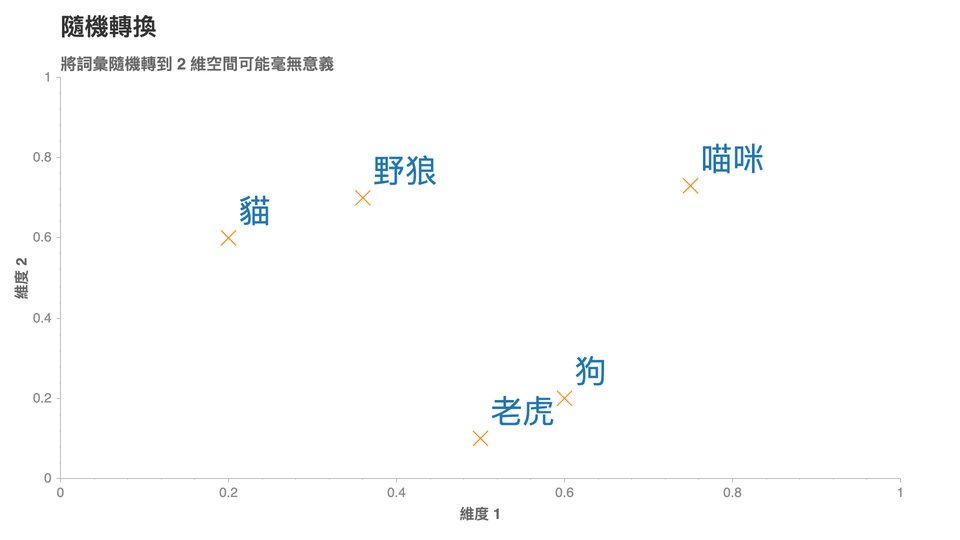

In [197]:
#ignore
df = pd.DataFrame({'name': ['野狼', '老虎', '狗', '貓', '喵咪'], 
                   'x': [0.36, 0.5, 0.6, 0.2, 0.75], 
                   'y': [0.7, 0.1, 0.2, 0.6, 0.73],
                   'size': 15
                  })

ch = chartify.Chart(blank_labels=True)
ch.set_title("隨機轉換")
ch.set_subtitle("將詞彙隨機轉到 2 維空間可能毫無意義")
ch.plot.text(df, 'x', 'y', text_column='name', font_size='2em', x_offset=10, y_offset=-10)
ch.axes.set_xaxis_range(0, 1)
ch.axes.set_yaxis_range(0, 1)
ch.axes.set_xaxis_label("維度 1")
ch.axes.set_yaxis_label("維度 2")
ch.plot.scatter(df, 'x', 'y', size_column='size', marker='x').show('png')

<br/>

這些代表詞彙的向量被稱之為詞向量，但是你可以想像這樣的隨機轉換很沒意義。

比方說上圖，我們就無法理解：
- 為何「狗」是跟「老虎」而不是跟同為犬科的「野狼」比較接近？
- 為何「貓」的維度 2 比「狗」高，但卻比「野狼」低？
- 維度 2 的值的大小到底代表什麼意義？
- 「喵咪」怎麼會在那裡？

這是因為我們只是將詞彙隨機地轉換到 2 維空間，並沒有讓這些轉換的結果（向量）反應出詞彙本身的語意（Semantic）。

一個理想的轉換應該是像底下這樣：

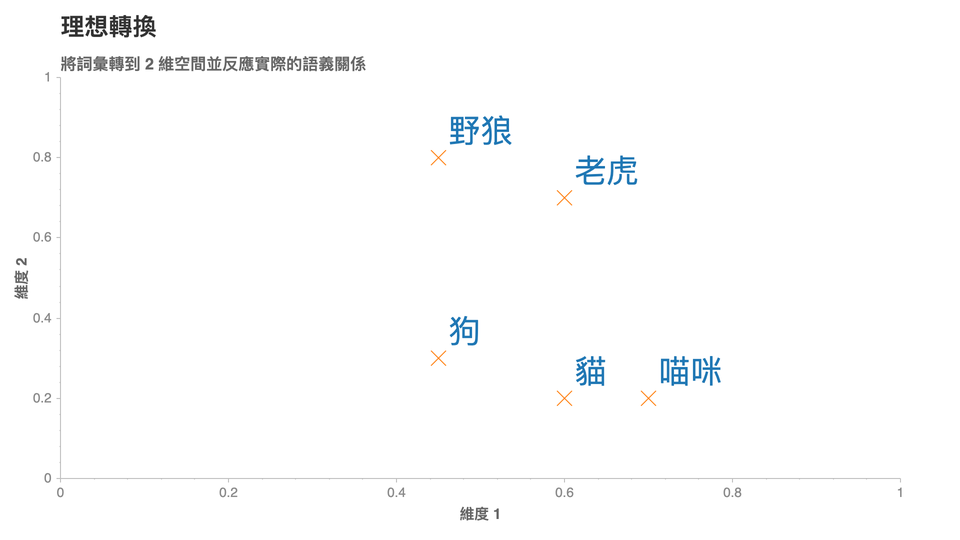

In [196]:
#ignore
df = pd.DataFrame({'name': ['野狼', '老虎', '狗', '貓', '喵咪'], 
                   'x': [0.45, 0.6, 0.45, 0.6, 0.7], 
                   'y': [0.8, 0.7, 0.3, 0.2, 0.2],
                   'size': 15})

ch = chartify.Chart(blank_labels=True)
ch.set_title("理想轉換")
ch.set_subtitle("將詞彙轉到 2 維空間並反應實際的語義關係")
ch.plot.text(df, 'x', 'y', text_column='name', font_size='2em', x_offset=10, y_offset=-10)
ch.axes.set_xaxis_range(0, 1)
ch.axes.set_yaxis_range(0, 1)
ch.axes.set_xaxis_label("維度 1")
ch.axes.set_yaxis_label("維度 2")
ch.plot.scatter(df, 'x', 'y', size_column='size', marker='x').show('png')

<br/>

在這個 2 維空間裡頭，我們可以發現一個好的轉換有 2 個特性：
- 距離有意義：「喵咪」與意思相近的詞彙「貓」距離接近，而與較不相關的「狗」距離較遠
- 維度有意義：看看（狗, 貓）與（野狼, 老虎）這兩對組合，可以發現我們能將維度 1 解釋為貓科 VS 犬科；維度 2 解釋為寵物與野生動物

!image
- nlp-kaggle-intro/dog-and-cat.jpg

如果我們能把語料庫（Corpus）裏頭的每個詞彙都表示成一個像是這樣有意義的詞向量，神經網路就能幫我們找到潛藏在大量詞彙中的語義關係，並進一步改善 NLP 任務的精準度。

好消息是，大部分的情況我們並不需要自己手動設定每個詞彙的詞向量。我們可以隨機初始化所有詞向量（如前述的隨機轉換），並利用平常訓練神經網路的[反向傳播算法（Backpropagation）](https://zh.wikipedia.org/wiki/%E5%8F%8D%E5%90%91%E4%BC%A0%E6%92%AD%E7%AE%97%E6%B3%95)，讓神經網路自動學到一組適合當前 NLP 任務的詞向量（如上張圖的理想狀態）。

!image
- nlp-kaggle-intro/backpropagation-example.gif
- 反向傳播讓神經網路可以在訓練過程中修正參數，持續減少預測錯誤的可能性
- https://www.youtube.com/watch?v=Ilg3gGewQ5U

在 NLP 裏頭，這種將一個詞彙或句子轉換成一個實數詞向量（Vectors of real numbers）的技術被稱之為[詞嵌入（Word Embedding）](https://zh.wikipedia.org/wiki/%E8%AF%8D%E5%B5%8C%E5%85%A5)。

而在 Keras 裡頭，我們可以使用 `Embedding` 層來幫我們做到這件事情：

In [ ]:
from keras import layers
embedding_layer = layers.Embedding(
    MAX_NUM_WORDS, NUM_EMBEDDING_DIM)

`MAX_NUM_WORDS` 是我們的字典大小（10,000 個詞彙）、`NUM_EMBEDDING_DIM` 則是詞向量的維度。

`Embedding` 層一次接收 k 個長度任意的數字序列，並輸出 k 個長度相同的序列。輸出的序列中，每個元素不再是數字，而是一個 `NUM_EMBEDDING_DIM` 維的詞向量。

假如我們將第一筆（也就是 k = 1）假新聞標題 A 丟入 `Embedding` 層，並設定 `NUM_EMBEDDING_DIM` 為 3 的話，原來的標題 A：

In [212]:
#ignore
for seq in x1_train[:1]:
    print("新聞標題:")
    print('[')
    for j in seq:
        print(f"\t{j},")
    print()
    print(']')

新聞標題:
[
	0,
	0,
	0,
	185,
	300,
	72,
	4029,
	37,
	1,
	121,
	250,
	95,
	30,
	511,
	92,
	2358,
	33,
	2565,
	19,
	55,

]


就會被轉換成類似以下的形式：

In [210]:
#ignore
import random
for seq in x1_train[:1]:
    print("新聞標題:")
    print('[')
    for j, _ in enumerate(seq):
        if j < 3:
            print('\t[0.212, 0.111, 0.666], ')
        else:
            print(f'\t[{round(random.random(), 3)}, {round(random.random(), 3)}, {round(random.random(), 3)}], ')
    print(']')

新聞標題:
[
	[0.212, 0.111, 0.666], 
	[0.212, 0.111, 0.666], 
	[0.212, 0.111, 0.666], 
	[0.528, 0.344, 0.452], 
	[0.163, 0.93, 0.58], 
	[0.527, 0.262, 0.246], 
	[0.077, 0.695, 0.776], 
	[0.624, 0.962, 0.96], 
	[0.456, 0.927, 0.404], 
	[0.353, 0.119, 0.108], 
	[0.805, 0.969, 0.725], 
	[0.379, 0.265, 0.473], 
	[0.436, 0.186, 0.738], 
	[0.923, 0.287, 0.967], 
	[0.477, 0.614, 0.838], 
	[0.089, 0.328, 0.993], 
	[0.887, 0.913, 0.885], 
	[0.604, 0.118, 0.646], 
	[0.907, 0.52, 0.437], 
	[0.443, 0.432, 0.498], 
]


序列裡頭的每個數字（即詞彙）都被轉換成一個 3 維的詞向量，而相同數字則當然都會對應到同一個詞向量（如前 3 個 `0` 所對應到的詞向量）。

!image
- nlp-kaggle-intro/rnn-process-vectors.gif
- Keras 的 Embedding Layer 讓我們可以輕鬆將詞彙轉換成適合神經網路的詞向量
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

有了這樣的轉換，我們就能將轉換後的詞向量丟入 RNN / LSTM 裏頭，讓模型逐步修正隨機初始化的詞向量，並使得分類任務的精準度逐漸上升。

有了兩個新聞標題的詞向量，接著讓我們瞧瞧能夠處理這些數據的神經網路架構吧！

## 一個神經網路，兩個新聞標題

一般來說，多數你見過的神經網路只會接受一個資料來源：
* 輸入一張圖片，判斷是狗還是貓
* 輸入一個音訊，將其轉成文字
* 輸入一篇新聞，判斷是娛樂還是運動新聞

!image
- nlp-kaggle-intro/one-data-source-nn.jpg

單一輸入的神經網路架構可以解決大部分的深度學習問題。但在這個 Kaggle 競賽裡頭，我們想要的是一個能夠讀入成對新聞標題，並判斷兩者之間關係的神經網路架構：
- 不相關（unrelated）
- 新聞 B 同意 A（agreed）
- 新聞 B 不同意 A（disagreed）

要怎麼做到這件事情呢？

我們可以使用[孿生神經網路（Siamese Network）](https://www.coursera.org/lecture/convolutional-neural-networks/siamese-network-bjhmj)架構：

!image
- nlp-kaggle-intro/siamese-network.jpg
- 使用孿生神經網路架構來處理同類型的 2 個新聞標題

這張圖是本文最重要的一張圖，但現在你只需關注紅框的部分即可。剩餘細節我會在後面的[定義神經網路的架構](#定義神經網路的架構)小節詳述。

重複觀察幾次，我相信你就會知道何謂孿生神經網路架構：一部份的神經網路（紅框部分）被重複用來處理多個不同的資料來源（在本篇中為 2 篇不同的新聞標題）。

而會想這樣做，是因為不管標題內容是新聞 A 還是新聞 B，其標題本身的語法 & 語義結構大同小異。

!quote
- 神經網路說到底，就跟其他機器學習方法相同，都是對輸入進行一連串有意義的數據轉換步驟。神經網路將輸入的數據轉換成更適合解決當前任務的數據格式，並利用轉換後的數據進行預測。

以這樣的觀點來看的話，我們並不需要兩個不同的 LSTM 來分別將新聞 A 以及新聞 B 的詞向量做有意義的轉換，而是只需要讓標題 A 與標題 B 共享一個 LSTM 即可。畢竟，標題 A 跟標題 B 的數據結構很像。

如果我們只寫一個 Python 函式就能處理 2 個相同格式的輸入的話，為何要寫 2 個函式呢？

孿生神經網路也是相同的概念。

!image
- nlp-kaggle-intro/siamese-cats.jpg
- Siamese 事實上代表暹羅貓。就像是這邊的暹羅貓雙胞胎一樣，你可以想像孿生神經網路架構裡頭也有 2 個一模一樣的神經網路雙胞胎

好了，在了解如何同時讀入 2 個資料來源後，就讓我們實際用 Keras 動手將此模型建出來吧！

## 深度學習 3 步驟

深度學習以及 NLP 領域的學問博大精深，但一般來說，當你想要實際動手寫出一個神經網路的時候，有 3 個基本步驟可以 follow：

!image
- nlp-kaggle-intro/deep-learning-three-steps-with-keras.jpg
- 用深度學習框架 Keras 來實作深度學習的基本 3 步驟
- http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017_2/Lecture/keras.pdf

1. 定義神經網路的架構
2. 決定如何衡量模型的表現
3. 訓練模型並挑選最好的結果

接下來你會看到，大約 80 % 的程式碼會花在實作第一個步驟。剩餘 2 個步驟在使用 Keras 的情況下非常容易就能實現；但後面我們也會談到，你將花 80 % 的時間在最後一個步驟上面。

首先，先讓我們進入第一步驟。

### 定義神經網路的架構

在實作之前，先讓我們回顧一下前面段落看到的模型架構：

!image
- nlp-kaggle-intro/siamese-network.jpg
- 本文用來實現假新聞分類的神經網路架構

從左到右掃過一遍，你可以很清楚地發現我們需要以下 5 個元素來完成這個模型：
- 兩個新聞標題（兩個長度為 20 的數字序列）
- 一個詞嵌入層：將數字序列轉換為詞向量序列
- 一個 LSTM 層：讀入前層的詞向量並萃取標題語義
- 一個串接層：將兩個新聞標題的處理結果（也是向量）串接成一個向量
- 一個全連接層：將前層的向量轉換為 3 個分類的預測機率

有些層我們已經在前面章節看過 Keras 的實現，比方說[詞嵌入層](#詞向量：將詞彙表達成有意義的向量)以及 [LSTM 層](#記憶力好的-LSTM-細胞)。剩下的串接層以及全連結層在 Keras 也都有現成的模組可供使用。

另外值得一提的是，圖上的每個層（Layer）以及向量右下的灰字都對應了底下 Python 程式碼裡頭的變數名稱：

!image
- nlp-kaggle-intro/siamese-network.jpg
- 灰字代表程式碼裡頭對應的變數名稱

因此，如果等等你不了解底下某個特定的變數所代表的意義，可以回來利用這張架構圖來釐清概念。

以下就是此模型的 Keras 實作：

In [214]:
# 基本參數設置，有幾個分類
NUM_CLASSES = 3

# 在語料庫裡有多少詞彙
MAX_NUM_WORDS = 10000

# 一個標題最長有幾個詞彙
MAX_SEQUENCE_LENGTH = 20

# 一個詞向量的維度
NUM_EMBEDDING_DIM = 256

# LSTM 輸出的向量維度
NUM_LSTM_UNITS = 128

In [215]:
# 建立孿生 LSTM 架構（Siamese LSTM）
from keras import Input
from keras.layers import Embedding, \
    LSTM, concatenate, Dense
from keras.models import Model

# 分別定義 2 個新聞標題 A & B 為模型輸入
# 兩個標題都是一個長度為 20 的數字序列
top_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')
bm_input = Input(
    shape=(MAX_SEQUENCE_LENGTH, ), 
    dtype='int32')

# 詞嵌入層
# 經過詞嵌入層的轉換，兩個新聞標題都變成
# 一個詞向量的序列，而每個詞向量的維度為 256
embedding_layer = Embedding(
    MAX_NUM_WORDS, NUM_EMBEDDING_DIM)
top_embedded = embedding_layer(
    top_input)
bm_embedded = embedding_layer(
    bm_input)

# LSTM 層
# 兩個新聞標題經過此層後為一個 128 維度向量
shared_lstm = LSTM(NUM_LSTM_UNITS)
top_output = shared_lstm(top_embedded)
bm_output = shared_lstm(bm_embedded)

# 串接層將兩個新聞標題的結果串接單一向量
# 方便跟全連結層相連
merged = concatenate(
    [top_output, bm_output], 
    axis=-1)

# 全連接層搭配 Softmax Activation
# 可以回傳 3 個成對標題屬於各類別的可能機率
dense =  Dense(
    units=NUM_CLASSES, 
    activation='softmax')
predictions = dense(merged)

# 我們的模型就是將數字序列的輸入，轉換
# 成 3 個分類的機率的所有步驟 / 層的總和
model = Model(
    inputs=[top_input, bm_input], 
    outputs=predictions)

這段程式碼不短，但有將近一半是我寫給你的註解。而且這段程式碼的邏輯跟上面的架構圖一模一樣，只差一個是從左到右、一個是從上到下而已。

你應該也已經發現，只要擁有前面幾章學到的 NLP 知識以及基礎 Python 程式能力，要建立一個像這樣看似複雜的孿生 LSTM（Siamese LSTM）神經網路也並沒有那麼困難。

事實上，使用 Keras 建立深度學習模型這件事情感覺上就像是在玩疊疊樂一樣，一層加上一層：

!image
- nlp-kaggle-intro/playing-with-keras.jpg
- 一位研究生利用 Keras 做深度學習的心得
- https://youtu.be/Lx3l4lOrquw?t=277

### 全連接層

唯一沒有在前面章節提到的是[全連接層（Fully Connected Layer）](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/fc_layer.html)以及其使用的 [Softmax 函式](https://zh.wikipedia.org/wiki/Softmax%E5%87%BD%E6%95%B0)。

全連接層顧名思義，代表該層的每個神經元（Neuron）都會跟前一層的所有神經元享有連結：

!image
- nlp-kaggle-intro/fully-connected.jpg
- 因為只需要預測 3 個分類，本文的全連接層只有 3 個神經元

而為了確認我們計算的參數量無誤，還可以使用 `model.summary()` 來看每一層的參數量以及輸出的張量（Tensor）長相：

In [ ]:
model.summary()

!image
- nlp-kaggle-intro/model-summary.jpg

全連接層在最下面。而因為其與前一層「緊密」連接的緣故，它在 Keras 裏頭被稱為 `Dense` 層。它也是最早出現、最簡單的神經網路層之一。

`Param #` 則紀錄了每一層所包含的模型參數（Parameters）。在機器學習的過程中，這些參數都會不斷地被調整，直到能讓模型能做出很好的預測。

這張表另外一個值得注意的地方是所有層的 Output Shape 的第一個維度都是 `None`。而 `None` 代表著可以是任意的數字。

在 Keras 裡頭，第一個維度代表著樣本數（#Samples），比方說前 9,527 筆新聞標題 A 的數字序列的 `shape` 應該要是 `（9527, 20）`：

In [222]:
x1_train[:9527].shape

(9527, 20)

嗯，結果跟我們想像的一樣。

而之所以每層的樣本數為 `None` 是因為 Keras 為了因應在不同場合會丟入不同數量的樣本需求。比方說，在訓練時你可能一次丟 32 筆資料給模型訓練，但在預測的時候一次只丟 16 筆資料。

### Softmax 函式

Softmax 函式一般都會被用在整個神經網路的最後一層上面，比方說我們這次的全連接層。

Softmax 函式能將某層中的所有神經元裡頭的數字作正規化（Normalization）：將它們全部壓縮到 0 到 1 之間的範圍，並讓它們的和等於 1。

!image
- nlp-kaggle-intro/softmax-and-fully-connectead.jpg
- Softmax 能將多個數字作正規化，讓它們的值為 1
- https://towardsdatascience.com/deep-learning-concepts-part-1-ea0b14b234c8

因為
1. 所有數值都位於 0 到 1 之間
2. 所有數值相加等於 1

這兩個條件恰好是機率（Probability）的定義，Softmax 函式的運算結果可以讓我們將每個神經元的值解釋為對應分類（Class）的發生機率。

以我們的假新聞分類任務來說的話，每個值就各代表以下分類的發生機率：
- 不相關： 0.46
- 新聞 B 同意新聞 A：0.34
- 新聞 B 不同意新聞 B：0.20

如果現在是在做預測且我們只能選出一個分類當作答案的話，我們可以說這次的分類結果最有可能是「不相關」這個類別，因為其發生機率最高。

在定義好模型以後，我們就可以進入下個步驟：定義衡量模型好壞的指標。

### 決定如何衡量模型的表現

為了讓機器自動「學習」，我們得給它一個[損失函數（Loss Function）](https://zh.wikipedia.org/wiki/%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0)。

給定一個正確解答 `y` 以及模型預測的結果 `y_head`，我們的模型透過損失函數就能自動計算出現在的預測結果跟正解的差距為多少。

透過損失函數的回饋，模型會盡全力修正參數，以期將此損失函數的結果下降到最低（也就是讓預測結果 `y_head` 跟正解 `y` 越來越接近）。

!image
- nlp-kaggle-intro/loss-function.jpg
- 圖中的拋物線為損失函數在不同參數 w 下的損失值。模型會持續修正參數 w 以期最小化損失函數
- https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c

那你會問，在假新聞分類裡頭，我們應該使用什麼損失函數呢？

我們在[將正解做 One-hot Encoding](#將正解做-One-hot-Encoding) 一節有稍微提到，我們會希望
- 正確的分類的機率分佈 P1（例：`[1, 0, 0]`）
- 模型預測出的機率分佈 P2（例：`[0.7, 0.2, 0.1]`）

這 2 個機率分佈的「差距」越小越好，而能計算 2 個機率分佈之間的差距的[交叉熵（Cross Entropy）](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E7%86%B5)就是這次的分類問題中最適合的損失函數。

!image
- nlp-kaggle-intro/cross-entropy.jpg
- 交叉熵能幫我們計算兩個機率分佈的差距，適合作為分類問題的損失函數
- https://youtu.be/tRsSi_sqXjI?t=44

在 Keras 裏頭，我們可以這樣定義模型的損失函數：

In [229]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

`categorical_crossentropy` 即是我們剛剛所說的交叉熵，而 `accuracy` 則是準確度，會被我們用來在訓練過程中了解模型的表現情況。

精準度的定義為：
```text
# 模型預測正確的樣本數
-------------------
#     總樣本數
```

雖然有了交叉熵來當作我們模型的損失函數，但是實際上模型要如何更新裡頭的參數呢？我們需要一個[優化器（Optimizer）](https://keras-cn.readthedocs.io/en/latest/other/optimizers/)來做到這件事情。

!image
- nlp-kaggle-intro/loss-function-learning.gif
- 不同優化器透過調整參數來降低損失函數的情形，就像是在想辦法往溜滑梯的低處滑一樣
- https://stats.stackexchange.com/questions/357449/two-large-decreses-in-loss-function-with-adam-optimizer

雖然我們有很多種優化器，但它們基本上都是從[梯度下降法（Gradient Descent）](https://zh.wikipedia.org/wiki/%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D%E6%B3%95)延伸而來。

在上圖的不同位置，梯度下降法會重新計算每個參數對損失函數的梯度（斜率）。接著梯度下降法會利用該梯度來修正參數，使得使用新參數算出來的損失函數的值能夠持續往下降。

不同優化器則有各自往下滑的秘方，比方說自動調整 [Learning rate](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)。

現在就先讓我們使用 [RMSProp 優化器](https://keras-cn.readthedocs.io/en/latest/other/optimizers/)。而在有了損失函數以及優化器以後，我們就可以正式開始訓練模型了！

### 訓練模型並挑選最好的結果

這步驟很直觀，我們就是實際使用 `model.fit` 來訓練剛剛定義出來的孿生 LSTM 模型：

In [ ]:
# 決定一次要放多少成對標題給模型訓練
BATCH_SIZE = 512

# 決定模型要看整個訓練資料集幾遍
NUM_EPOCHS = 10

# 實際訓練模型
history = model.fit(
    # 輸入是兩個長度為 20 的數字序列
    x=[x1_train, x2_train], 
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    # 每個 epoch 完後計算驗證資料集
    # 上的 Loss 以及準確度
    validation_data=(
        [x1_val, x2_val], 
        y_val
    ),
    # 每個 epoch 隨機調整訓練資料集
    # 裡頭的數據以讓訓練過程更穩定
    shuffle=True
)

這邊特別值得拿出來提的是以下兩個參數：
- `BATCH_SIZE`
- `NUM_EPOCHS`

依照我們前面對損失函數（Loss Function）的說明，理論上模型是把訓練資料集裡頭的 32 萬筆資料全部看完一遍之後，再更新一次參數以降低損失函數。

但是這樣太曠日廢時，訓練可能要花很久才能完成。

!image
- nlp-kaggle-intro/rawpixel-584290-unsplash.jpg

實務上都是每次只放入幾筆訓練數據，讓模型看完這些資料後就做一次參數的更新。而這個「幾筆」，就是 `BATCH_SIZE`。

依照 `BATCH_SIZE` 的大小，梯度下降（Gradient Descent, 後稱 GD）可以概括為 3 個類別：
- GD（`BATCH_SIZE` = 訓練資料集大小，且這時不稱為 batch）
- Mini-batch GD（`BATCH_SIZE` 通常為一個較小的 2 的倍數）
- SGD（`BATCH_SIZE` = 1）

!image
- nlp-kaggle-intro/sgd-vs-mini-batch.jpg
- 想像損失函數是個越往裡面值就越低的碗，梯度下降就是要想辦法到達中心點
- https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3

如上圖所示，下方的 GD 因為在每次更新參數前都會看完訓練資料集裡頭所有的數據，因此它更新參數的方向是最可靠的。但要往前走一步就就得看完 32 萬筆數據，未免成本也太大。

另一個極端是上方的 SGD：模型每看完 1 個訓練數據就嘗試更新權重，而因為單一一筆訓練數據並不能很好地代表整個訓練資料集，前進的方向非常不穩定。

!image
- nlp-kaggle-intro/mini-batch.jpg
- 隨機梯度下降（SGD）與 Mini-batch 梯度下降的比較
- https://datascience-enthusiast.com/DL/Optimization_methods.html

因此我們常常採用的是中庸之道： Mini-batch GD 的方式來訓練模型，而這靠的是指定 `model.fit` 函式裡頭的 `batch_size`。

`NUM_EPOCHS` 則很容易理解：你希望模型不只將 32 萬筆的訓練數據都看過一遍，而是每一筆資料還要多看過好幾次，以讓模型確確實實地從它們身上學到東西。`NUM_EPOCHS` = 10 的意思就代表模型會重複看整個訓練資料集 10 次。

接著讓我們看看 Keras 的訓練過程：

!image
- nlp-kaggle-intro/training-process.jpg
- 利用 Keras 訓練神經網路的過程

因為模型的目標就是要最小化損失函數（Loss Function），你可以觀察到當模型看過越多訓練資料集（Training Set）的數據以後，損失值（loss）就越低，分類的準確度（acc）則越高。

這代表我們的模型越來越熟悉訓練資料集裡頭的數據，因此在訓練資料集裡頭的表現越來越好。

如果依照準確度以及損失值分別畫圖的話則會長這樣：

In [8]:
#ignore
# 從 Colab 拿到的結果, 10 epoch
history = {'acc': [0.7790306702680581,
  0.8272441141564584,
  0.8454632428583582,
  0.8592523779350338,
  0.870403621657637,
  0.8807056099221862,
  0.8892605585179351,
  0.8966334821387081,
  0.9041554587893834,
  0.9103914200722426],
 'loss': [0.47094012744689007,
  0.3799349189536854,
  0.347333448015709,
  0.32305877142379485,
  0.3017699401964612,
  0.2832128398769367,
  0.2665049661657404,
  0.25118608824035393,
  0.2368026953019595,
  0.22330002222368328],
 'val_acc': [0.8131960693638144,
  0.8193417563339492,
  0.8316331304043806,
  0.8358134453576694,
  0.8389642804205613,
  0.8416783650269878,
  0.8410232410957504,
  0.8444236470038611,
  0.847387303294118,
  0.8467633756697225],
 'val_loss': [0.41044795769571124,
  0.40356610638640483,
  0.3768265308372094,
  0.3746898113974653,
  0.3703388722903121,
  0.37028306904216207,
  0.37151181513295123,
  0.3692146523501605,
  0.37759135704370766,
  0.3806773028439171]}

In [9]:
#ignore
import pandas as pd
import chartify
from bokeh.layouts import gridplot
from bokeh.io import show

actual_epochs = len(history['acc'])

result = pd.DataFrame(history)
result['epoch'] = [e for e in range(1, actual_epochs + 1)]


melted = pd.melt(result, id_vars='epoch')
acc = melted[melted.variable.isin(['acc', 'val_acc'])]
loss = melted[melted.variable.isin(['loss', 'val_loss'])]

In [ ]:
#ignore
for m in ['acc', 'loss']:
    if m == 'acc':
        df = acc
        title = 'Train / Valid 準確度（Accuracy）'
    else:
        df = loss
        title = 'Train / Valid 損失值（Loss）'
    
    ch = chartify.Chart(blank_labels=True, layout='slide_50%')
    ch.plot.scatter(df, 'epoch', 'value', color_column='variable')
    ch.set_title(title)
    ch.axes.set_xaxis_label('# Epoches')
#     ch.show("png")

!image
- nlp-kaggle-intro/training-result.jpg

很明顯地，我們的神經網路有過適（Overfittng）的問題：儘管在訓練資料集表現得非常好（準確度超過 90 %、損失小於 0.2），在從沒看過的驗證資料集的表現就相對遜色不少。且在第 6 個 epoch 之後驗證資料集的準確度 `val_acc` 就沒什麼在上升，驗證集的損失 `val_loss` 則已經逐漸上升。

這代表模型利用從訓練資料集學到的模式（Pattern）還無法非常精準地預測沒見過的事物。

!image
- nlp-kaggle-intro/deep-learning-three-steps-with-keras.jpg
- 用 Keras 來實作深度學習的基本 3 步驟

如同我們在[這章節一開頭](#深度學習-3-步驟)所說的，雖然第 3 步驟：「訓練模型並挑選最好的結果」的 Keras 實作非常簡單（基本上就是 `model.fit( ...)`），但實際上在一個機器學習 / 深度學習專案裡頭，你將會花 80 % 的時間在這個步驟裡頭調整參數，想辦法找到一個最棒的模型。

儘管如此，我們現在最想知道的還是這個模型在真實世界（也就是測試資料集）到底能表現多好，因此先讓我們試著拿這個簡單模型來做預測吧！

## 進行預測並提交結果

就跟我們對訓練 / 驗證資料集做的[資料前處理](#資料前處理：讓機器能夠處理文字)一樣，要對測試資料集（Test Set）做預測，我們得先將裡頭的文本數據通通轉換成能夠丟進模型的數字序列資料。

首先，讓我們把測試資料集讀取進來：

In [38]:
#ignore
TEST_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/test.csv'
TEST_TOKENIZED_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/test_tokenized.csv'

In [39]:
import pandas as pd
test = pd.read_csv(
    TEST_CSV_PATH, index_col=0)
test.head(3)

,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en
id,,,,,,
321187,167562,59521,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,辟谣！里昂官方否认费基尔加盟利物浦，难道是价格没谈拢？,egypt 's presidential election failed to win m...,Lyon! Lyon officials have denied that Felipe F...
321190,167564,91315,萨达姆被捕后告诫美国的一句话，发人深思,10大最让美国人相信的荒诞谣言，如蜥蜴人掌控着美国,A message from Saddam Hussein after he was cap...,The Top 10 Americans believe that the Lizard M...
321189,167563,167564,萨达姆此项计划没有此国破坏的话，美国还会对伊拉克发动战争吗,萨达姆被捕后告诫美国的一句话，发人深思,Will the United States wage war on Iraq withou...,A message from Saddam Hussein after he was cap...


測試資料集跟訓練資料集的唯一差別只在沒有 `label` 欄位，因此我們只需要將當初在[資料前處理](#資料前處理：讓機器能夠處理文字)章節使用的步驟原封不動地套用在測試資料集即可。

你可以趁機複習一下有哪些步驟：

In [ ]:
# 以下步驟分別對新聞標題 A、B　進行
# 文本斷詞 / Word Segmentation
test['title1_tokenized'] = \
    test.loc[:, 'title1_zh'] \
        .apply(jieba_tokenizer)
test['title2_tokenized'] = \
    test.loc[:, 'title2_zh'] \
        .apply(jieba_tokenizer)

# 將詞彙序列轉為索引數字的序列
x1_test = tokenizer \
    .texts_to_sequences(
        test.title1_tokenized)
x2_test = tokenizer \
    .texts_to_sequences(
        test.title2_tokenized)

# 為數字序列加入 zero padding
x1_test = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(
        x1_test, 
        maxlen=MAX_SEQUENCE_LENGTH)
x2_test = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(
        x2_test, 
        maxlen=MAX_SEQUENCE_LENGTH)    

# 利用已訓練的模型做預測
predictions = model.predict(
    [x1_test, x2_test])

這些步驟現在對你來說應該都已經不再陌生。

讓我們看一下從模型得到的預測結果長什麼樣子：

In [ ]:
predictions[:5]

!image
- nlp-kaggle-intro/test-predictions.jpg

跟我們之前討論過的一樣，模型針對每一筆成對新聞標題的輸入，會回傳給我們 3 個分類的機率值。

現在，我們只要將機率值最大的類別當作答案，並將這個結果轉回對應的文本標籤即可上傳到 Kaggle：

In [ ]:
index_to_label = {v: k for k, v in label_to_index.items()}

test['Category'] = [index_to_label[idx] for idx in np.argmax(predictions, axis=1)]

submission = test \
    .loc[:, ['Category']] \
    .reset_index()

submission.columns = ['Id', 'Category']
submission.head()

!image
- nlp-kaggle-intro/submission.jpg

得到上面的 DataFrame 以後，我們可以將其儲存成 CSV 並上傳到 kaggle，而結果如下：

!image
- nlp-kaggle-intro/first-submission-result.jpg
- 我們的 NLP 模型第一次的結果

如果你還記得我們在[用直覺找出第一條底線](#用直覺找出第一條底線)章節的內容的話，就會知道 0.675 並不是應該多好的結果，但的確比多數票決好了一點點。

不過不需要操之過急，因為任何機器學習專案都需要一個重複改善的迴圈。在第一次預測就做出完美結果的情況很少，重點是持續改善。

!image
- nlp-kaggle-intro/thor-alvis-754589-unsplash.jpg

在第一次提交結果以後，我們還可以做非常多事情來嘗試改善模型效能：
- 改變字典詞彙量、序列長度
- 改變詞向量的維度
- 嘗試[預先訓練的詞向量](https://ithelp.ithome.com.tw/articles/10194633)如 [ELMo](https://zhuanlan.zhihu.com/p/38254332)、[GloVe](https://nlp.stanford.edu/projects/glove/)
- 調整 LSTM 層的輸出維度
- 使用不同優化器、調整 Learning rate
- 改變神經網路架構如使用 GRU 層
- ...

能改善模型的方式很多，但因為牽涉範圍太廣，請容許我把它們留到未來的文章。

走到這裡代表你已經完整地經歷了一個 NLP 專案所需要的大部分步驟。在下一節．讓我們回顧一下在這趟旅程中你所學到的東西。

## 我們是怎麼走到這裡的

在這趟 NLP 旅程裏頭，我們學會了不少東西。

現在的你應該已經了解：
- NLP 中常見的數據前處理以及實踐方法
- 詞向量以及詞嵌入的基本概念
- 常見的神經網路架構如全連接層、RNN 以及 LSTM
- 如何用 Keras 建構一個完整的神經網路架構
- 深度學習 3 步驟：建模、定義衡量指標以及訓練模型
- 梯度下降、優化器以及交叉熵等基本概念
- 如何利用已訓練模型對新數據做預測

呼，這可真了不起，值得慶祝！

!image
- nlp-kaggle-intro/wil-stewart-24562-unsplash.jpg

能閱讀到這裡，我相信你對深度學習以及 NLP 領域是抱著不少興趣的。而為了讓你在閱讀本文以後能夠繼續探索這個世界，在下一章節我則會介紹 3 門非常推薦的線上課程。

我則會在本文最後稍微總結一下自己的心得。

現在，先看看有哪些課程吧！

## 3 門推薦的線上課程

為了奠定 NLP 的基礎，這一個月我邊複習邊看了不少新的教學文章以及線上課程。

截至目前，我認為有 3 個 CP 值十分高的課程值得推薦給你：
1. 台大電機系李宏毅教授的[深度學習課程](http://speech.ee.ntu.edu.tw/~tlkagk/courses_MLDS18.html)
    - 奠定理論基礎
2. Coursera 的[ Deep Learning 專項課程](https://www.coursera.org/specializations/deep-learning)
    - 理論 70 % + 實作 30 %
3. 深度學習框架 [Keras](https://keras.io/) 作者 [François Chollet](https://ai.google/research/people/105096) 的 [Deep Learning with Python Video Edition](https://www.oreilly.com/library/view/deep-learning-with/9781617294433VE/)
    - 注重程式實作

這邊說的 CP 值高（對，我知道你最愛 CP 值）指的是能用最少的時間、精力以及金錢來確確實實地學好 NLP 的理論及實作基礎。

!image
- nlp-kaggle-intro/Hung-yi-Lee-ml-courses.jpg
- 李宏毅教授的 Youtube 播放清單
- https://www.youtube.com/channel/UC2ggjtuuWvxrHHHiaDH1dlQ/playlists

[李宏毅教授](http://www.ee.ntu.edu.tw/profile?id=1020908)的機器學習課程內行的都知道，大概是全世界最好、最完整的 Deep Learning 中文學習資源。李教授在課程中廣徵博引學術論文，但卻同時非常淺顯易懂。你可以在這邊看到[教授所有的 Youtube 課程播放清單](https://www.youtube.com/channel/UC2ggjtuuWvxrHHHiaDH1dlQ/playlists)。

就我所知，教授在台大上課很注重實作，有不少作業需要完成，但因為線上只有影片可以查看，因此我將其分類為「奠定理論基礎」。

!image
- nlp-kaggle-intro/deeplearning-ai-courses.jpg
- Deep Learning Specialization
- https://www.coursera.org/specializations/deep-learning

原 Google Brain 的[吳恩達教授](https://zh.wikipedia.org/wiki/%E5%90%B4%E6%81%A9%E8%BE%BE)的 [Deep Learning 專項課程](https://www.coursera.org/specializations/deep-learning)則是 Coursera 上最受歡迎的深度學習課程。跟我們這篇文章最相關的 NLP 技術則被涵蓋在該專項課程的最後一堂課：[Sequence Models](https://www.coursera.org/learn/nlp-sequence-models)。

我在大約一年前完成包含[卷積神經網路 CNN](https://www.coursera.org/learn/convolutional-neural-networks) 的前四堂課，而因為課程上線已有一段時間，現在影片大都有簡體或繁體中文的字幕，不太需要煩惱聽不懂英文。

!image
- nlp-kaggle-intro/deeplearning-with-python.jpg

[Deep Learning with Python Video Edition](https://www.oreilly.com/library/view/deep-learning-with/9781617294433VE/) 的作者 [François Chollet](https://ai.google/research/people/105096) 為軟體工程師出身，設計出知名深度學習框架 Keras，目前則在 Google AI 工作。

該書以 Programmer 的角度出發，提供了利用 Keras 實現各種 NLP 任務的範例，十分適合在熟悉深度學習理論後想要實作的人閱讀。

就算你不想花錢買書或是訂閱 [O'Relly Online](https://www.safaribooksonline.com)，你也可以在他有 5,000 多顆星的 Github Repo [deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks) 看到跟該課程相關的所有 Jupyter Notebooks。

!image
- nlp-kaggle-intro/maxwell-ridgeway-685077-unsplash.jpg

這些課程可以說是幫助我完成這篇文章以及 Kaggle 競賽的最大功臣，而我也希望能透過這篇文章的微薄之力，讓你知道他們的存在，並隨著他們繼續你從這邊開始的 NLP 探險。

## 結語：從掌握基礎到運用巨人之力

網路上多的是專業的 NLP 教學文章或論文探討，但非常平易近人的中文文章卻少之又少。

在這篇文章裏頭，我嘗試使用最簡單的詞彙向你解釋 NLP 領域以及深度學習的一些重要概念。

在文章開頭我說：

!quote
- 希望這篇文章能成為你前往自然語言處理世界的最佳橋樑。

我不確定橋樑有沒有成功被建起，但這座橋樑本身的存在是必要的。

現在深度學習以及 NLP 領域實在發展太快，就算一個人有興趣也常常不知從何開始學起。

事實上，NLP 的發展速度還在加快，而這既是好消息也是壞消息。

!image
- nlp-kaggle-intro/jack-anstey-383370-unsplash.jpg
- NLP 如果是輛衝往未來的火車的話，深度學習就是它的引擎，而你的數據是它的燃料。另外，多數人還沒有登上這台火車

這邊說的 NLP，其實更適合用人工智慧取代。

對還沒掌握機器學習 / 深度學習 / NLP 知識的人來說，這些技術只會離自己越來越遠，最後遠到只會在新聞報導或科幻小說上看到，儘管被這些技術驅動的龐大系統每天影響著他們的生活。

!image
- nlp-kaggle-intro/rawpixel-780496-unsplash.jpg

至於那些已經掌握這些知識的人，透過運用[巨人之力](https://github.com/google-research/bert)，就連一般人也能做到以前憑自己力量做不到的事情。

比方說利用 Google 在今年 11 月公開的龐大[語言代表模型 BERT](https://github.com/google-research/bert)，我不費吹灰之力就在本文的 [Kaggle 競賽](https://www.kaggle.com/c/fake-news-pair-classification-challenge)達到 85 % 的正確率，距離第一名 3 %，排名前 30 %。

!image
- nlp-kaggle-intro/kaggle-final-result.png

我們之前設計的 LSTM 模型則僅有 67 % 準確度。

並不是說只要用新的語言模型就好，這篇學的東西都不重要。事實上正好相反：正是因為有了此篇的 NLP 基礎知識，才讓我得以順利地運用該巨人之力。

深度學習以及 NLP 領域發展快速，但你總要從某個地方開始好好地學習基礎，而且越快開始越好。

所以最後一個問題就是：

!quote
- 你，什麼時候開始出發？